<a href="https://colab.research.google.com/github/aaoiii/2024-ESAA-OB/blob/main/11%EC%A3%BC%EC%B0%A8_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 케라스
## 01. 딥러닝 준비
- GPU 연산을 수행하는 기능을 직접 실행하지 않고 백엔드 엔진을 지정하여 사용
- 딥러닝 라이브러리를 간결한 코드로 실행할 수 있도록 설계

## 1-1 주요 용어
**하이퍼파라미터**
- 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
- 가중치와 편향은 자동 업데이터 조정, 학습속도나 반복 훈련 횟수등은 직접 설정
- 튜닝 : 하이퍼파라미터의 값을 조절

**과소적합 vs. 과대적합**
- 훈련용 데이터 (train set)
- 예측용 데이터 (test set)
- 과소적합 : 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어질 때
- 과대적합 : 학습 데이터를 지나치게 반복 학습하여 과하게 적합
- 불필요한 노이즈 해소 필요

**에포크**
- 딥러닝 모델이 반복훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

**손실함수**
- 손실함수 : 예측값과 정답값의 차이 또는 오차
- 오차 : 딥러닝 모델의 출력값과 실제값의 차이

<지도학습 분류 문제>
- 이진분류 : binary_crossentropy
  - 출력층 활성화 함수 : sigmoid
- 다중분류 : categorical_crossentropy
  - 다중 분류의 대상이 되는 클래스가 원핫 벡터인 경우 사용
  - 레이블 값으로 표현되어 서로다른 숫자로 구분되어 있으면 sparse_categorical_crossentropy 사용
  - 출력층 활성화 함수 : softmax

회귀 모델 : MAE, MSE, Huber ...

텐서플로 사전정의 손실함수 함수형/클래스형


In [ ]:
import tensorflow as tf
# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

**경사하강법**
- 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
- 손실함수 값을 최소로 만드는 가중치 찾을 수 있음
- Loss = 1/2 * sum(y-yhat)^2
- y=wx+b

손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

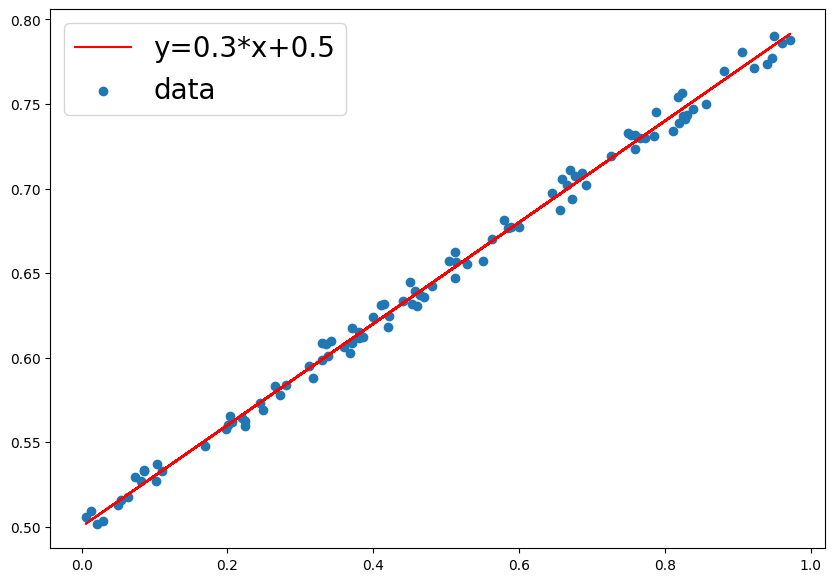

w:0.3,b:0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터세트
def make_linear(w=0.5,b=0.8,size=50,noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y=make_linear(w=0.3,b=0.5,size=100,noise=0.01)

- 가설함수
- 손실함수
- alpha : 학습률

In [4]:
# 최대 반복 횟수
num_epoch=1000

# 학습률
learning_rate=0.005

# 에러 기록
errors=[]

# random한 값으로 w,b초기화
w=np.random.uniform(low=0.0,high=1.0)
b=np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  y_hat=w*x+b

  # loss function 정의
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break
  #gradient 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}.b={2:.5f}error={3:.5f}'.format(epoch,w,b,error))

  print("-----"*15)
  print('{0:2}w={1:.1f}.b={2:.1f}error={3:.5f}'.format(epoch,w,b,error))

 0w=0.54870.b=0.42671error=1.24328
---------------------------------------------------------------------------
 0w=0.5.b=0.4error=1.24328
---------------------------------------------------------------------------
 1w=0.5.b=0.4error=0.34297
---------------------------------------------------------------------------
 2w=0.5.b=0.4error=0.20607
---------------------------------------------------------------------------
 3w=0.5.b=0.4error=0.17759
---------------------------------------------------------------------------
 4w=0.5.b=0.4error=0.16495
 5w=0.49483.b=0.40040error=0.15506
---------------------------------------------------------------------------
 5w=0.5.b=0.4error=0.15506
---------------------------------------------------------------------------
 6w=0.5.b=0.4error=0.14603
---------------------------------------------------------------------------
 7w=0.5.b=0.4error=0.13756
---------------------------------------------------------------------------
 8w=0.5.b=0.4error=0.12960
---

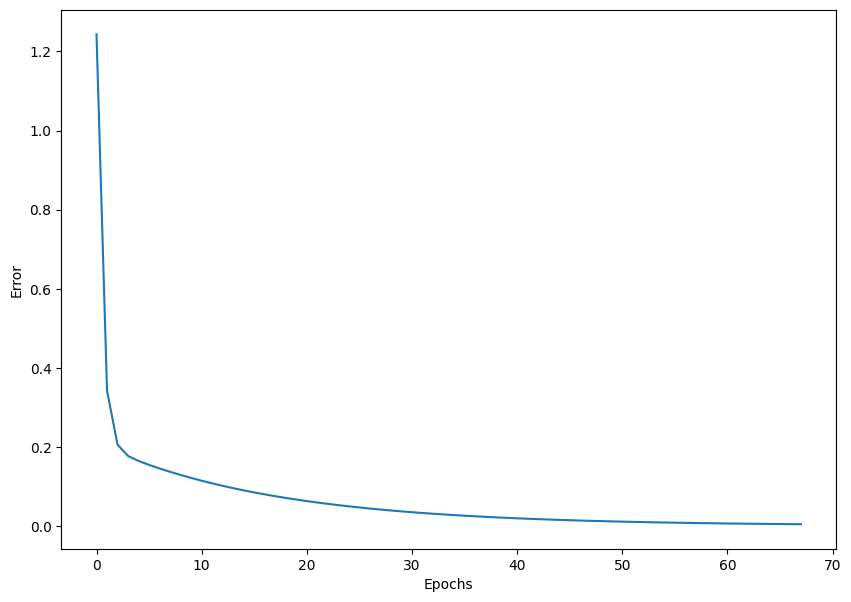

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2 딥러닝 프로세스

데이터 로드 => 데이터 전처리 => 데이터 분할 => 모델 생성, 컴파일 => 훈련, 검증 예측

## 1-2-1 데이터 전처리
스케일 조정, 차원 변경 가능

## 1-2-2 모델 생성
- 순차적인 구조 모델 : Sequential API
- 다중 입력 출력 : Functional API, Model Subclassing

## 1-2-3 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 정의

## 1-2-4 모델 훈련
- fit()
- epoch, 배치 크기, 콜백 함수

## 1-2-5 모델 검증
- 모델 훈련 시 사용하지 않은 검증 데이터셋을 모델에 입력하고 예측값을 정답과 비교하여 평가지표 계산

## 1-2-6 모델 예측


## 02 단순 신경망 훈련
## 2-1 선형 회귀

y=ax+b

- 딥러닝에서는 기울기 a 대신 가중치 w를 많이 사용

y=wx+b
(b는 편향)

## 2-2 뉴런
- 노드
- 신경망은 여러개의 레이어를 가지고 하나의 레이어는 한개 이상의 뉴런으로 구성
- 뉴런 내부에는 가중치 존재, 훈련 진행하며 오차 역전파를 통해 뉴런의 가중치 업데이트

## 2-3 Dense 레이어
- 심층 신경망 모델을 구성하는 기본 레이어
- 완전 연결층
- 노드 개수와 활성화 함수 지정 가능


In [ ]:
import tensorflow as tf

# 10 개 노드로 이루어진 Dense레이어
tf.keras.layers.Dense(10)

# Relu 활성화 함수 적용
tf.keras.layers.Dense(10,activation='relu')

## 2-4 데이터셋 만들기

In [6]:
x=np.arange(1,6)

y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


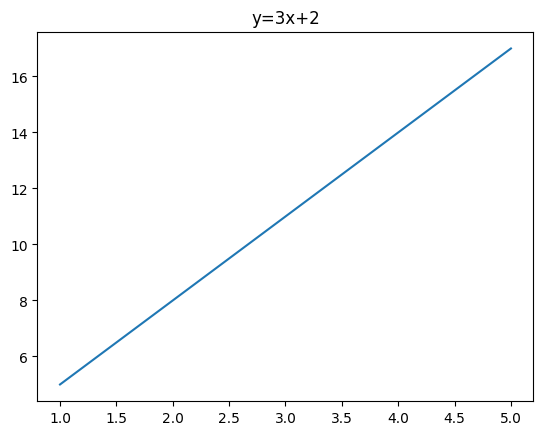

In [7]:
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

## 2-5 sequential API

- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 가짐

## 2-5-1 모델 구조

In [9]:
import tensorflow as tf

# 리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [10]:
# add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 2-5-2 입력 데이터 형태

- Sequential API를 사용하면 첫번째 층은 input_shape 매개변수 지정해야함


In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

## 2-5-3 단순선형회귀 모델 정의
- 1개의 뉴런을 가지는 Dense 레이어 한개 사용

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

## 2-6 모델 요약
model.summary()

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Total params : 모델 내부에 존재하는 모든 파라미터 합
- Trainable params : 모델 훈련 시 업데이트 할 파라미터 총 개수
- Non-trainable params : 훈련 시 업데이트하지 않을 파라미터 총 개수
- 단순 선형회귀모델에서는 업데이트 파라미터 : w,b

## 2-7 컴파일
- 옵티마이저, 손실함수 평가지표
- 학습률, 모멘텀 ..

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd'mloss='mse',metrics=['mse','mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [16]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

## 2-8 훈련



In [17]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 473ms/step - loss: 82.6069 - mae: 8.5485
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 48.2647 - mae: 6.5769
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 28.2509 - mae: 5.0716
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 16.5870 - mae: 3.9223
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.7891 - mae: 3.0448


In [19]:
# 단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

# 훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 330ms/step - loss: 273.2197 - mae: 15.2951
Epoch 2/1200
1/1 [==============================] - 0s 21ms/step - loss: 159.2574 - mae: 11.7043
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 92.8455 - mae: 8.9630
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 54.1437 - mae: 6.8703
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 31.5900 - mae: 5.2726
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 18.4465 - mae: 4.0529
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 10.7869 - mae: 3.1218
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 6.3230 - mae: 2.4108
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.7214 - mae: 1.8680
Epoch 10/1200
1/1 [==============================] - 0s 17ms/step - loss: 2.2051 - mae: 1.4535
Epoch 11/1200
1/1 [==============================

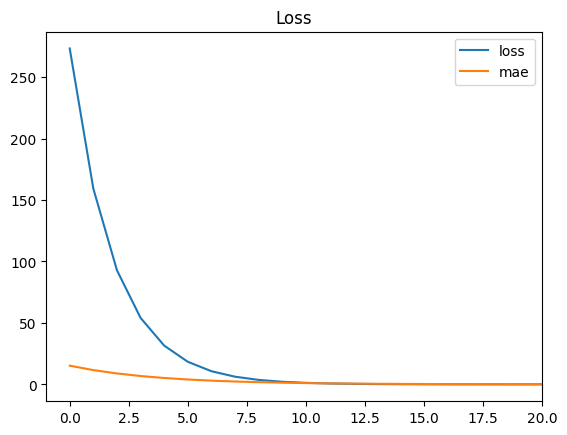

In [20]:
import matplotlib.pyplot as plt

# 20 epochs까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title("Loss")
plt.legend()
plt.show()

- 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행

## 2-9 검증
evaluate()

In [21]:
model.evaluate(x,y)

1/1 [==============================] - 0s 229ms/step - loss: 2.7652e-05 - mae: 0.0045


[2.7651516575133428e-05, 0.004513454623520374]

## 2-10 예측

In [22]:
model.predict([10])

1/1 [==============================] - 0s 368ms/step


array([[32.021812]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류
## 3-1 케라스 내장 데이터셋 로드

In [23]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

In [24]:
# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [25]:
# 데이터셋 확인
print('train set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


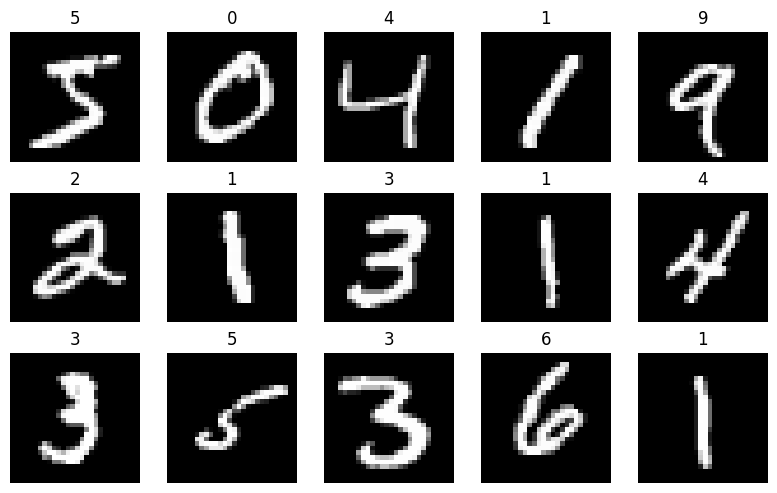

In [29]:
import matplotlib.pyplot as plt

# canvas 생성
fig,axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5,i%5]
  #imshow 로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2 데이터 전처리

In [30]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 0~255 범위의 값 가짐
- 데이터 범위를 0~1로 설정하기 위해 255로 나눔

In [31]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()},최대값:{x_train.max()}')

# 데이터 정규화
x_train=x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()},최대값:{x_train.max()}')

정규화 전] 최소값: 0,최대값:255
정규화 후] 최소값: 0.0,최대값:1.0


In [38]:
x_test=x_test/x_test.max()

In [39]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3 Flatten 레이어
- Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야함

In [35]:
print(f'변경 전 shape:{x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [36]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 3-4 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수
- 선형 관계를 나타내는 함수에 비선형성 추가
- 시그모이드, 하이퍼볼릭 탄젠트, ReLU, ...

In [ ]:
# Dense 레이어에 relu 활성화함수 적용
tf.keras.layers.Dense(128,activation='relu')

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## 3-5 입력과 출력
- input_shape 매개변수
- 마지막 레이어는 출력층
- 출력층의 노드 개수는 반드시 분류해야할 클래스 개수와 동일해야함

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드 = 10개 (클래스 개수)
    tf.keras.layers.Dense(10,activation='softmax'),

])


- 출력층 노드 개수가 2개 이상인 다중분류문제 경우에는 softmax 함수 적용

In [41]:
# 출력층 노드=1 => sigmoid
tf.keras.layers.Dense(1,activation='sigmoid')

# 출력층 노드=2개 이상 => softmax
tf.keras.layers.Dense(10,activation='softmax')

## 3-6 손실함수

In [42]:
# 이진 분류
model.compile(loss='binary_crossentropy')

In [43]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,1.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저
- 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- Adam, SGD, Adagrad, RMSprop ...

In [ ]:
# 클래스 인스턴스로 지정
adam=tf.keras.optimizer.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compule(optimizer='Adam')

## 3-8 평가지표

- accuracy,auc, precision, recall


In [ ]:
# 클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compule(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

## 3-9 훈련

In [45]:
model.fit(x_train,y_train,
          # 검증 셋 지정
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2329 - val_loss: 0.1342
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1000 - val_loss: 0.0997
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0725 - val_loss: 0.0897
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0561 - val_loss: 0.0951
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0468 - val_loss: 0.1013
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0404 - val_loss: 0.1063
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0335 - val_loss: 0.1109
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0292 - val_loss: 0.1153
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - val_loss: 0.1306
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

## 3-10 평가

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('검증 셋 정확도:',test_acc)

## 3-11 예측

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions[0]

- softmax 활성화함수를 거친 10개의 출력값은 10개의 개별 클래스에 대한 분류 확률값
- 가장 높은 확률값을 가진 클래스가 최종 예측 출력값

In [ ]:
import numpy as np

# 0번 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

In [48]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img,y_true,y_pred,confidence=x_test[idx],y_test[idx],np.argmax(predictions[idx]),
  100*np.max(predicions[idx])
  return img, y_true, y_pred, confidence

  # canvas 생성
  fig, axes=plt.subplots(3,5)
  fig.set_size_inches(12,10)
  for i in range(15):
    ax=axes[i//5,i%5]
    img,y_true,y_pred,confidence=get_one_result(i)
    #imshow 로 이미지 시각화
    ax.imshow(img,cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True:{y_true}')
    ax.set_xlabel(f'Prediction:{y_pred}\nConfidence:({confidence:.2f}%)')
  plt.tight_layout()
  plt.show()